# Linear Regression for Forecasting Spreads

### Import Requirements

In [36]:
import pandas as pd
import numpy as np
import pandas_ta as ta
import matplotlib.pyplot as plt

### Data Preparation and Feature Engineering

In [151]:
df = pd.read_parquet('AAPL.parquet')

In [ ]:
df.corr()

In [152]:
datetime = df['BarDateTime'].dt.tz_localize(None)

In [153]:
hour = df['BarDateTime'].dt.hour
df['Hour'] = hour

In [154]:
del df['BarDateTime']
df['BarDateTime'] = datetime

In [58]:
df.columns

Index(['TradeDate', 'Ticker', 'SecId', 'OpenBarTimeOffset', 'OpenBidPrice',
       'OpenBidSize', 'OpenAskPrice', 'OpenAskSize', 'FirstTradeTimeOffset',
       'FirstTradePrice', 'FirstTradeSize', 'HighBidTimeOffset',
       'HighBidPrice', 'HighBidSize', 'HighAskTimeOffset', 'HighAskPrice',
       'HighAskSize', 'HighTradeTimeOffset', 'HighTradePrice', 'HighTradeSize',
       'LowBidTimeOffset', 'LowBidPrice', 'LowBidSize', 'LowAskTimeOffset',
       'LowAskPrice', 'LowAskSize', 'LowTradeTimeOffset', 'LowTradePrice',
       'LowTradeSize', 'CloseBarTimeOffset', 'CloseBidPrice', 'CloseBidSize',
       'CloseAskPrice', 'CloseAskSize', 'LastTradeTimeOffset',
       'LastTradePrice', 'LastTradeSize', 'MinSpread', 'MaxSpread',
       'CancelSize', 'VolumeWeightPrice', 'NBBOQuoteCount', 'TradeAtBid',
       'TradeAtBidMid', 'TradeAtMid', 'TradeAtMidAsk', 'TradeAtAsk',
       'TradeAtCrossOrLocked', 'Volume', 'TotalTrades', 'FinraVolume',
       'FinraVolumeWeightPrice', 'UptickVolume', 'Dow

In [155]:
df = df.drop(['TradeDate',
              'Ticker',
               'SecId',
               'OpenBarTimeOffset',
               'FirstTradeTimeOffset',
               'HighBidTimeOffset',
               'HighAskTimeOffset',
               'HighTradeTimeOffset',
               'LowTradeTimeOffset',
               'LowBidTimeOffset',
               'LowAskTimeOffset',
               'CloseBarTimeOffset',
               'LastTradeTimeOffset'],
               axis=1)

In [156]:
df.set_index(['BarDateTime'], inplace=True)

In [157]:
df.fillna(method='ffill')

,OpenBidPrice,OpenBidSize,OpenAskPrice,OpenAskSize,FirstTradePrice,FirstTradeSize,HighBidPrice,HighBidSize,HighAskPrice,HighAskSize,...,UptickVolume,DowntickVolume,RepeatUptickVolume,RepeatDowntickVolume,UnknownTickVolume,TradeToMidVolWeight,TradeToMidVolWeightRelative,TimeWeightBid,TimeWeightAsk,Hour
BarDateTime,,,,,,,,,,,,,,,,,,,,,
2017-12-01 04:00:00,0.00,0,0.00,0,171.6700,1,171.00,200,180.00,100,...,1,0,0,0,1,26.00000,0.27368,170.96105,171.95013,4
2017-12-01 04:01:00,170.95,200,171.95,500,171.5600,1,170.95,200,171.95,500,...,0,172,0,28,0,-28.47500,-0.44492,170.94881,171.71315,4
2017-12-01 04:02:00,170.95,100,171.59,300,171.0500,56,171.00,100,171.80,200,...,58,194,0,50,0,-19.49669,-0.25615,170.65635,171.59012,4
2017-12-01 04:03:00,170.90,400,171.59,300,170.9700,5,170.90,400,171.59,300,...,5,95,0,0,0,-41.39000,-0.40578,170.57965,171.59000,4
2017-12-01 04:04:00,170.57,1000,171.59,300,0.0000,0,170.60,200,171.59,300,...,0,0,0,0,0,0.00000,0.00000,170.59260,171.53966,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-21 19:55:00,135.63,1000,135.66,100,135.6500,20,135.64,100,135.66,100,...,31,350,6,54,0,-0.29688,-0.09896,135.63071,135.66000,19
2022-06-21 19:56:00,135.64,100,135.66,100,135.6500,1,135.64,100,135.70,100,...,786,39,146,1,0,0.67275,0.16819,135.64000,135.69786,19
2022-06-21 19:57:00,135.64,500,135.70,100,135.6900,10,135.67,1000,135.72,200,...,25,129,118,1339,0,-1.67012,-0.34628,135.66263,135.70435,19


In [158]:
df = df[(df.Hour > 8) & (df.Hour < 16)]

In [159]:
is_nan = df.isna().any()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(is_nan)


OpenBidPrice                   False
OpenBidSize                    False
OpenAskPrice                   False
OpenAskSize                    False
FirstTradePrice                False
FirstTradeSize                 False
HighBidPrice                   False
HighBidSize                    False
HighAskPrice                   False
HighAskSize                    False
HighTradePrice                 False
HighTradeSize                  False
LowBidPrice                    False
LowBidSize                     False
LowAskPrice                    False
LowAskSize                     False
LowTradePrice                  False
LowTradeSize                   False
CloseBidPrice                  False
CloseBidSize                   False
CloseAskPrice                  False
CloseAskSize                   False
LastTradePrice                 False
LastTradeSize                  False
MinSpread                      False
MaxSpread                      False
CancelSize                     False
V

In [107]:
# df = df.notna()


In [108]:
# df.isnull().sum().sum()


0

In [129]:
# df2 = df.dropna()

In [ ]:
# df.to_csv('AAPL.csv')

### Calculate Dataset Features

##### Spread

In [160]:
df['Spread'] = df.apply(lambda x: x['CloseAskPrice'] - x['CloseBidPrice'], axis=1)

##### Returns

In [161]:
# returns = (df.apply(lambda x: ((x.LastTradePrice - x.FirstTradePrice)/x.FirstTradePrice)))
import decimal

# df['Returns'] = df.apply(lambda x: (x['LastTradePrice'] - x['FirstTradePrice'])/x['FirstTradePrice'], axis=1)

df['Returns'] = df.apply(lambda x:
     (x['LastTradePrice'] - x['FirstTradePrice'])/x['FirstTradePrice'] if x['FirstTradePrice'] != 0
     else decimal.Decimal('NaN'), axis=1)

##### Relative Volatility Index (RVI)

In [128]:
# df['RVI'] = df.apply(lambda x: ta.rvi(high = x['HighTradePrice'],
#                                       low = x['LowTradePrice'],
#                                       close = x['LastTradePrice'],
#                                       length = 14, refined = False,
#                                       thirds = False, mamode = 'sma')
#                                       if x['FirstTradePrice'] or x['LowTradePrice'] or x['HighTradePrice'] != 0
#                                       else decimal.Decimal('NaN'), axis=1)

# df['RVI'] = rvi

# del(rvi)

##### Volatility of Closing Trade

In [134]:
# df['Volatility_StDev6_CloseTrade'] = (df.apply(lambda x: ta.stdev(length=6, close = x['LastTradePrice']), axis=1))
# df['Volatility_StDev12_CloseTrade'] = (df.apply(lambda x: ta.stdev(length=12, close = x['LastTradePrice']), axis=1))
# df['Volatility_StDev20_CloseTrade'] = (df.apply(lambda x: ta.stdev(length=20, close = x['LastTradePrice']), axis=1))
# df['Volatility_StDev30_CloseTrade'] = (df.apply(lambda x: ta.stdev(length=30, close = x['LastTradePrice']), axis=1))
# df['Volatility_StDev50_CloseTrade'] = (df.apply(lambda x: ta.stdev(length=50, close = x['LastTradePrice']), axis=1))

# # df['Volatility_StDev6_CloseTrade'] = stdev_closetrade_6
# # df['Volatility_StDev12_CloseTrade'] = stdev_closetrade_12
# # df['Volatility_StDev20_CloseTrade'] = stdev_closetrade_20
# # df['Volatility_StDev30_CloseTrade'] = stdev_closetrade_30
# # df['Volatility_StDev50_CloseTrade'] = stdev_closetrade_50

# # del(stdev_closetrade_6)
# # del(stdev_closetrade_12)
# # del(stdev_closetrade_20)
# # del(stdev_closetrade_30)
# # del(stdev_closetrade_50)

##### Volatility of Spread

In [133]:
# df['Volatility_StDev6_Spread'] = (df.apply(lambda x: ta.stdev(length=6, close = x['Spread']), axis=1))
# df['Volatility_StDev12_Spread'] = (df.apply(lambda x: ta.stdev(length=12, close = x['Spread']), axis=1))
# df['Volatility_StDev20_Spread'] = (df.apply(lambda x: ta.stdev(length=20, close = x['Spread']), axis=1))
# df['Volatility_StDev30_Spread'] = (df.apply(lambda x: ta.stdev(length=30, close = x['Spread']), axis=1))
# df['Volatility_StDev50_Spread'] = (df.apply(lambda x: ta.stdev(length=50, close = x['Spread']), axis=1))

# # df['Volatility_StDev6_Spread'] = stdev_spread_6
# # df['Volatility_StDev12_Spread'] = stdev_spread_12
# # df['Volatility_StDev20_Spread'] = stdev_spread_20
# # df['Volatility_StDev30_Spread'] = stdev_spread_30
# # df['Volatility_StDev50_Spread'] = stdev_spread_50

# # del(stdev_spread_6)
# # del(stdev_spread_12)
# # del(stdev_spread_20)
# # del(stdev_spread_30)
# # del(stdev_spread_50)

##### Volatility of Volume

In [135]:
# df['Volatility_StDev6_Volume'] = (df.apply(lambda x: ta.stdev(length=6, close = x['Volume']), axis=1))
# df['Volatility_StDev12_Volume'] = (df.apply(lambda x: ta.stdev(length=12, close = x['Volume']), axis=1))
# df['Volatility_StDev20_Volume'] = (df.apply(lambda x: ta.stdev(length=20, close = x['Volume']), axis=1))
# df['Volatility_StDev30_Volume'] = (df.apply(lambda x: ta.stdev(length=30, close = x['Volume']), axis=1))
# df['Volatility_StDev50_Volume'] = (df.apply(lambda x: ta.stdev(length=50, close = x['Volume']), axis=1))

# # df['Volatility_StDev6_Volume'] = stdev_volume_6
# # df['Volatility_StDev12_Volume'] = stdev_volume_12
# # df['Volatility_StDev20_Volume'] = stdev_volume_20
# # df['Volatility_StDev30_Volume'] = stdev_volume_30
# # df['Volatility_StDev50_Volume'] = stdev_volume_50

# # del(stdev_volume_6)
# # del(stdev_volume_12)
# # del(stdev_volume_12)
# # del(stdev_volume_30)
# # del(stdev_volume_50)

##### Volatility of Returns

In [136]:
# df['Volatility_StDev6_Returns'] = (df.apply(lambda x: ta.stdev(length=6, close = x['Returns']), axis=1))
# df['Volatility_StDev12_Returns'] = (df.apply(lambda x: ta.stdev(length=12, close = x['Returns']), axis=1))
# df['Volatility_StDev20_Returns'] = (df.apply(lambda x: ta.stdev(length=20, close = x['Returns']), axis=1))
# df['Volatility_StDev30_Returns'] = (df.apply(lambda x: ta.stdev(length=30, close = x['Returns']), axis=1))
# df['Volatility_StDev50_Returns'] = (df.apply(lambda x: ta.stdev(length=50, close = x['Returns']), axis=1))

# # df['Volatility_StDev6_Returns'] = stdev_returns_6
# # df['Volatility_StDev12_Returns'] = stdev_returns_12
# # df['Volatility_StDev20_Returns'] = stdev_returns_20
# # df['Volatility_StDev30_Returns'] = stdev_returns_30
# # df['Volatility_StDev50_Returns'] = stdev_returns_50

# # del(stdev_returns_6)
# # del(stdev_returns_12)
# # del(stdev_returns_12)
# # del(stdev_returns_30)
# # del(stdev_returns_50)

##### Lagged Spread

In [162]:
df['Spread_Lag_1'] = df['Spread'].shift(+1)
df['Spread_Lag_2'] = df['Spread'].shift(+2)
df['Spread_Lag_3'] = df['Spread'].shift(+3)

In [141]:
is_nan = df.isna().any()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(is_nan)

OpenBidPrice                     False
OpenBidSize                      False
OpenAskPrice                     False
OpenAskSize                      False
FirstTradePrice                  False
FirstTradeSize                   False
HighBidPrice                     False
HighBidSize                      False
HighAskPrice                     False
HighAskSize                      False
HighTradePrice                   False
HighTradeSize                    False
LowBidPrice                      False
LowBidSize                       False
LowAskPrice                      False
LowAskSize                       False
LowTradePrice                    False
LowTradeSize                     False
CloseBidPrice                    False
CloseBidSize                     False
CloseAskPrice                    False
CloseAskSize                     False
LastTradePrice                   False
LastTradeSize                    False
MinSpread                        False
MaxSpread                

In [173]:
df = df[df['Spread_Lag_3'].notna()]
df = df[df['Returns'].notna()]

In [174]:
is_nan = df.isna().any()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(is_nan)

OpenBidPrice                   False
OpenBidSize                    False
OpenAskPrice                   False
OpenAskSize                    False
FirstTradePrice                False
FirstTradeSize                 False
HighBidPrice                   False
HighBidSize                    False
HighAskPrice                   False
HighAskSize                    False
HighTradePrice                 False
HighTradeSize                  False
LowBidPrice                    False
LowBidSize                     False
LowAskPrice                    False
LowAskSize                     False
LowTradePrice                  False
LowTradeSize                   False
CloseBidPrice                  False
CloseBidSize                   False
CloseAskPrice                  False
CloseAskSize                   False
LastTradePrice                 False
LastTradeSize                  False
MinSpread                      False
MaxSpread                      False
CancelSize                     False
V

### Plot Data

<AxesSubplot: xlabel='BarDateTime'>

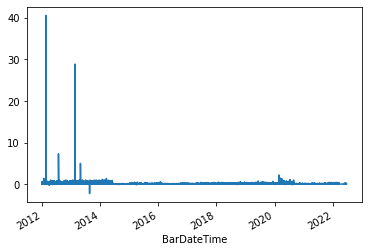

In [175]:
spread = pd.to_numeric(df['Spread'])
spread.plot()

### Reshape Data Set for Machine Learning

In [72]:
# train = df.loc[:'2022-06-21 15:59:00']
# test = df.loc['2022-02-01 9:00:00':]

In [73]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

In [74]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

C:\Users\angel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_data.py:464: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\angel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_data.py:465: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


### Cross Validation Using Sliding Window

In [75]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

ModuleNotFoundError: No module named 'tensorflow.python'

### Linear Regression

In [84]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [110]:
import numpy as np
x1,x2,x3,y=df['Spread_Lag_1'],df['Spread_Lag_2'],df['Spread_Lag_3'],df['Spread']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[False False False]
 [ True False False]
 [ True  True False]
 ...
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]


In [111]:
# len -> 1087348
X_train,X_test,y_train,y_test=final_x[:924245],final_x[924245:],y[:924245],y[924245:]


In [112]:
lin_model.fit(X_train,y_train)

LinearRegression()

In [28]:
def df_to_X_y2(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)

In [29]:
X2, y2 = df_to_X_y2(df)
X2.shape, y2.shape

((1087343, 5, 83), (1087343,))

In [30]:
X2_train, y2_train = X2[:950000], y2[:950000]
X2_val, y2_val = X2[950000:1025000], y2[950000:1025000]
X2_test, y2_test = X2[1025000:], y2[1025000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((950000, 5, 83),
 (950000,),
 (75000, 5, 83),
 (75000,),
 (62343, 5, 83),
 (62343,))

### Training an LSTM Model

In [83]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

ModuleNotFoundError: No module named 'tensorflow.python'

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
# df.set_index('BarDateTime', inplace=True)
# grouped_df = df.groupby('TradeDate')

In [ ]:
# df2 = df.apply(lambda x: x.iloc[0:50])

In [ ]:
# for i in range(0, len(df), 24):
    # slc = df.iloc[i : i + 24]

In [ ]:
# by_ticker_date = df.sort_index().groupby(['BarDateTime'])
# remove_non_mkt_hrs = (by_ticker_date.apply(lambda x: [x['09:30:00':'16:00:00']]))

In [ ]:
# index
# remove premarket and after market data

In [ ]:
# calc spread and other features 

steps
1. drop features we know we won't need
2. add features
3. corr()
4. basic linear regression
5. try cross validation / LSTM / RNN